# Salary Based on Years of Experience in Python - Simple Linear Regression
### Ever wondered how much money you should make based on your years of experience? Ever thought you are being payed to little with the years of experience you have? Or how much you should offer or be offered a salary for a new hire? This project seeks to answer all of those questions and more throught the use of Regression!

## Pre-Work

#### First we import commonly used python packages that we will use throughout the project. We import Pandas, numpy, matplotlib, plotly, and statsmodels.

In [3]:
# Import Pandas
import pandas as pd

# Import numpy
import numpy as np

# Import matplotlib
import matplotlib.pyplot as plt

# Import plotly
import plotly.express as px
import plotly.graph_objects as go

# Import statsmodels
from statsmodels.formula.api import ols
import statsmodels.api as sm

## Clean

#### Next we want to import the dataset and take a peek inside the first few rows of our dataset.

In [4]:
# Import dataset
df = pd.read_csv('C:/Users/rgens/Datasets/Salary_dataset.csv')

# Head dataset
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


#### Looking at our output we can see that an unnamed column has been used as an ID column. As we do not need this column, its cleaner to get rid of it.

In [5]:
# Get rid of unused column
df2 = df.drop('Unnamed: 0', axis=1)

# Head dataset again
df2.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


#### Perfect. Our data is now clean and ready to visualize.

## Visualize

#### Now we can start looking at some plots to visualize our data and verify one of the assumptions of Linear Regression. First, lets look at some boxplots.

In [6]:
# Responsive boxplot for X variable

# Creates boxplot
fig = px.box(df2['YearsExperience'], points = 'all')

# Creates titles and adjust size
fig.update_layout(title = f'Distribution of X', title_x = 0.5, yaxis_title = 'Years of Experience', width = 800, height = 500)

# Shows plot
fig.show()

#### Now, we have a beautiful, clean, and interactive boxplot of our X variable, Years of Experience. We see that there are no outliers which is good as this could skew results. We also see that the max years of experience is 10.6 and the minimum is 1.2. The median, or middle point, of our data set is 4.8 years. Feel free to have a look for yourself by hovering over different parts of the plot. Lets take a look at a boxplot for our Y variable, Salary.

In [7]:
# Responsive boxplot for Y variable
fig = px.box(df2['Salary'], points = 'all')

fig.update_layout(title = f'Distribution of Y', title_x = 0.5, yaxis_title = 'Salary in USD', width = 800, height = 500)

fig.show()

#### We can see from this plot that the max salary is 122.392k and the minimum salary is 37.732k. The median of our dataset is 65.238k. We also can see that there are no outliers in this variable either.

#### Now let's take a look at a scatterplot of our two variables.

In [8]:
# Scatterplot of YearsExperience vs Salary

# Creates scatterplot
fig = px.scatter(x = df2['YearsExperience'], y = df2['Salary'])

# Creates titles
fig.update_layout(title = 'YearsExperience vs Salary', title_x= 0.5, xaxis_title = 'Years of Experience',
                  yaxis_title = 'Salary in USD', height = 500, width = 700)

# Creates black lines around plot
fig.update_xaxes(showline = True, linewidth = 2, linecolor = 'black', mirror = True)

fig.update_yaxes(showline = True, linewidth = 2, linecolor = 'black', mirror = True)

# Shows plot
fig.show()

#### Amazing. We now have a scatterplot showing the relationship of Years of Experience versus that of Salary. We now verifiy the assumption that there is a linear relationship by drawing an imaginary line through the points and seeing if it will create a straight line. Drawing a line in my mind creates a pretty straight line so we can assume that there is a positive linear relationship.

## Model

#### The other assumptions of linear regression we will have to check after we run our model. So let's get to running it!

In [9]:
# Simple Linear Regression Model
model = ols('Salary ~ YearsExperience', data = df2).fit()

# Parameters
model.params

Intercept          24848.203967
YearsExperience     9449.962321
dtype: float64

#### We now have our simple linear regression model. From our model we got the parameters 24848.20 for our intercept and 9449.96 for our YearsExperience. We can use these two parameters to create our model equation. Our model equation is: Salary = 24848.20 + 9449.96 * (Years of Experience). We can interpret this as each additional year worked is associated with an increase in salary of 9449.96 US dollars.

#### Lets take a look at the summary of our model.

In [10]:
# Summary of model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 02 Mar 2023   Prob (F-statistic):           1.14e-20
Time:                        21:00:24   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.485e+04   2306.654     10.772      0.000    2.01e+04    2.96e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### We now have a summary of our model. Lets first take a look at the output R-Squared. We can see that we have a value of 0.957. This means that 95.7 percent of the variation in the response variable, Salary, can be explained by the YearsExperience variable. The closer to 1 the better so the fact we have a R-Squared value of 0.957 is good.

#### Let's next take a look at the section that says F-statistic and the Prob (F-statistic). We have a value of 622.5 for our F-Statistic and a p-value of 0.000. These statistics tell us the overall significance of our regression model. Put simply it tells us whether our model is useful for explaining the variation in the response variable. And since we have a p-value of 0.000 we say that our model is statistically significant at alpha = 0.05 and that our model is useful for explaining the variation in Salary.

#### Now lets look at the part of the summary that says P > |t|. This is a p-value that is associated with the coefficients from our model. It tells us if their is an association between the explanatory variable and the response. Since our value is below 0.05 we can say that there is a stastically significant association between Salary and Years of Experience.

eval_env: 1


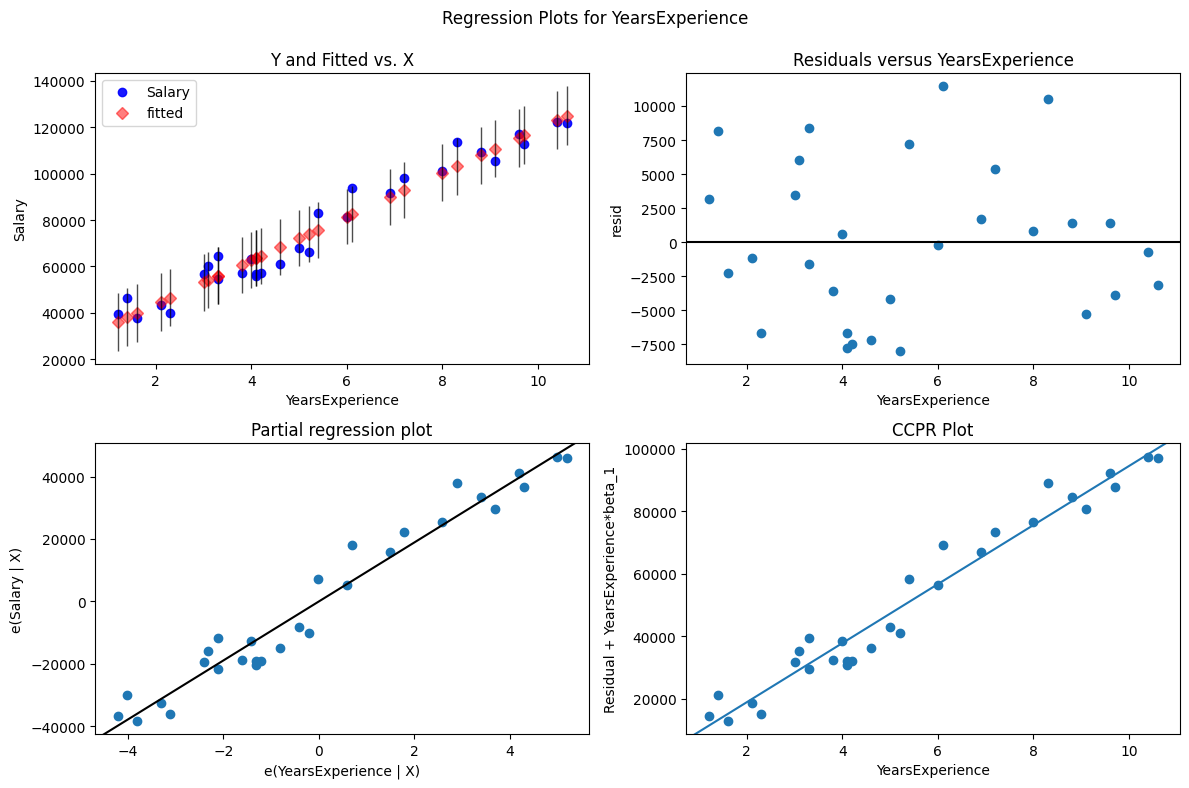

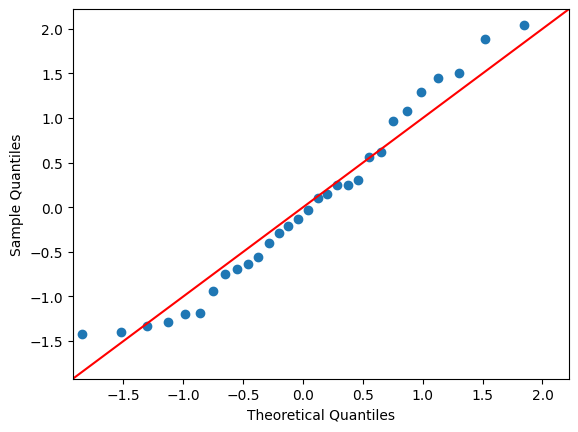

In [11]:
# Create Residual Plots and Q-Q plot
fig = plt.figure(figsize = (12,8))

fig = sm.graphics.plot_regress_exog(model, 'YearsExperience', fig=fig)

sm.qqplot(model.resid, fit=True,line='45')

plt.show()

#### We can now try to make three more assumptions that come with Linear Regression. We have to assume that there is no autocorrelation in residuals, no heteroscedasticity, and the residuals must be normally distributed.

#### The assumption that there is no autocorrelation in the residuals is simply asking are the residuals independent? We can make the assumption that there is no autocorrelation in the residuals by looking at the Durbin-Watson Score in the summary table above. If it is between 0 and 2 there is positive autocorrelation. If it is between 2 and 4 there is negative autocorrelation. If the value is 2 there is not autocorrelation. We want to be as close to 2 as we possibly can. Values between 1.5 and 2.5 are seen as relatively normal and aren't a cause for concern. We have a value of 1.648 we can assume for this projcet that the assumption has been met.

#### The assumption that there is no heteroscedasticity that the variance of the residuals is not constant across all values of the independent variable, X. If heteroscedasticity exists, that could mean the results of our regression is inaccurate. To check this we can look at the plot above that has the title "Residuals Versus YearsExperience." If the residuals make what looks to be a cone shape than that means there could be heteroscedasticity. Our residuals seem to have a random, and equal distribution which is good and what we want. We can make the assumption that no heteroscedasticity exists.

#### The final assumption is that the residuals must be normally distributed. We can look at this by looking at the Q-Q Plot which is the last plot produced above. If the points mostly follow a straight line we can assume that the residuals are normally distributed. Looking at the Q-Q Plot above our points seem to follow the line so we can assume that the residuals are normally distributed.



## Predict
#### Now that we have tested for all the assumptions of regression we can now move onto the last part of the project, predicting. For this all we have to do is make a value range of 0 - 11 years and use the .predict() function to make predictions for those values.

In [12]:
# Let's make some predictions

# Get values to predict off of
X = pd.DataFrame({'YearsExperience': np.arange(0,12)})

# Predict values
predict = model.predict(X)

# See the predicted values
print(predict)

0      24848.203967
1      34298.166288
2      43748.128609
3      53198.090931
4      62648.053252
5      72098.015574
6      81547.977895
7      90997.940217
8     100447.902538
9     109897.864860
10    119347.827181
11    128797.789503
dtype: float64


#### We can now see what our model has predicted for 0 - 11 years of experience. For example a person with 5 years of experience is predicted to have a salary of $72098. Now, we want to make a line out of these values and see how it compares to our original scatterplot.

In [13]:
# Let's take a look at our model on a scatterplot

fig = go.Figure()

# Adds trend lines where train will be red and prediction will be blue
fig.add_trace(go.Scatter(x=df2['YearsExperience'], y=df2['Salary'], name='train', mode='markers', marker_color='rgba(152, 0, 0, .8)'))

fig.add_trace(go.Scatter(x=X.iloc[:,0].tolist(), y=predict, name='prediction', mode='lines+markers', marker_color='rgba(0, 0, 152, .8)'))

# Adds titles
fig.update_layout(title = f'YearsExperience vs Salary W/ Model',title_x=0.5, xaxis_title= "Years of Experience", yaxis_title="Salary in USD")

# Shows lines around plot
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)

fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)

fig.show()



#### We now see our regression line on our original scatterplot. We can see just how well the regression model fit our data. Our line shows us, visually, that there is a positive relationship between Years of Experience and Salary.

## Conclusion

### You can now answer the questions that I posed at the beginning of this project. Being paid under 62K for 4 years of experience? Maybe it is time to ask for a raise. Have 7 years of experience under your belt and wondering what is a good value to put as a base? Look at our model and it will tell you that 91K is a good start. Of course there can be other factors such as location, and job type. But this model is a perfect starting point when asking these kind of questions.

### I hope this project was insightful to you! Comments, questions, or concerns? Feel free to email me at rgensel@att.net. Thank you!